In [1]:
import scipy
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybedtools
import os
from scipy import stats
import gc
import matplotlib as mpl
import glob
import  statsmodels.stats.multitest

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Mutant upregulated genes
mut_up=['PCNA','MDR-1','E2F-5','NFKB2','GLNRS','SRM','PARP1','MCM6','CCNB2','CD44','DRG1','CDC25A','EBAG9','MYBL2','ITGA6','POLA1','MAPKAPK3','PKP2','CD9','S1PR1','PSEN1','L1CAM','ITGB4','COL14A1','CLDN3','LGALS7','NFASC','ABLIM1','ACTA2','ADAMTSL4','ADPRTL2','AGGF1','AKT2','ALDH1A3','ALDH2','ALDH3A1','ANGPT1','APS','AR','ARHGEF2','ARID3B','ARNT2','ASB13','ATF3','ATIC','BAG2','BARD1','BCAN','BMP6','BPTF','BTG3','BTN3A3','C10orf116','C13orf1','C16orf45','C1orf63','C21orf63','CA2','CA9','CARS','CBR4','CCNB1IP1','CCNB2','CCNH','CCNL1','CD14','CD44','CDC2','CDC6','CDH1','CDKL3','CDS1','CEBPB','CKS1B','CLEC18C','CLMN','CPT1B','CPVL','CREB1','CTPS','CTSF','CUL5','CUL7','DAAM1','DCAF4','DHFRL1','DHRS9','DICER1','DMXL1','DRG1','E2F3','E2F5','EBAG9','EFHA1','EXPH5','F2R','FADS1','FAM169A','FBXO31','FDFT1','FECH','FTH1','FZD3','GAGE3','GAPVD1','GARS','GHDC','GINS1','GLI2','GMIP','GNB2L1','GOSR1','GPR153','GTF3A','GUCY1A3','HAS3','HAX1','HBA2','HHL','HIBCH','HIST1H4C','HMGB2','HOMER1','HOMER2','HSP90AB1','HYAL3','ID1','ID3','IL1RL1','IMPDH2','INADL','INF2','INPPL1','ITGA6','ITPR3','JUNB','JUP','KIAA0516','KIF13B','KIF24','KIF2C','KLF16','KPNA2','KRAS','KRT16','LARP','LOC115871','LOC120450','LOC139376','LOC81691','LPHN2','LPP','LRRFIP1','LRRK1','LYN','MAD2L1','MAL2','MAP2K5','MAP4','MAPKAPK2','MAPKAPK3','MAPKAPK4','MARCH_6','MARCKS','MAZ','MCL1','MCM3','MCM6','ME1','MED13','MEF2D','MELK','MEST','MFGE8','MINK','MMP28','MNX1','MOCOS','MRPL46','MRPS6','MTAP','MYC','MYO5B','NAP1L1','NARS','NBEA','NDC80','NDUFA4L2','NFATC2IP','NFKBIA','NKTR','NLRX1','NMI','NPC1','NUP153','PAQR3','PARD6B','PARP1','PCGF2','PDE3B','PDLIM5','PGAP3','PGM1','PHKB','PI3','PIAS2','PIK3CA','PLEKHH1','POLA2','POLD2','POLR2E','PRDM15','PRKCI','ProSAPiP1','PRPF40A','PRSS7','PRSS8','PVRL3','PYGL','QARS','RAD51C','RBBP6','RBBP8','RHOBTB2','RHOG','RLN1','RNF44','RNF6','RP3-402G11.5','RPGRIP1','RPS6KA3','RRM1','SARNP','SEC31A','SEZ6L2','SF3A2','SFPQ','SGPP2','SIRT6','SLC16A4','SLC26A2','SLC29A2','SLC4A7','SLC6A8','SLCO4A1','SLPI','SMA4','SMTN','SNTB2','SPAG5','SQSTM1','SRM','SS18','STAMBP','STAT3','STATH','TAF1A','TARS','TFAP2A','TMC6','TNFRSF9','TRAF3IP2','TREM1','TRIM29','TROVE2','TUBB','TUSC3','TXNIP','TXNL4A','UCN','UGT1A10','UGT2B28','UGT2B7','UPF1','VIM','XRCC5','YARS','ZBTB45','ZNF217','ZNF238','ZNF24','ZNF273','ZNF415','ZNF44','ZNF579','ZNF580','ZNF652']
### Mutant downregulated genes
mut_down=['MLL2','MLL1','ABAT','ABCA12','ABCG1','ABHD15','ABHD4','ABHD6','ABTB2','ACPP','AHSA2','AIFM2','AK1','AKR1B10','ALDH7A1','AMACR','ANK1','ANO4','APAF1','APOBEC3C','ARAP1','ARG1','ARHGAP6','ARHGEF3','ASPA','ATP11B','BCHE','BCL11B','BDKRB1','BDNF','BLNK','BTF3L3','BTG2','C13orf31','C15orf41','C16orf5','C17orf103','C19orf59','C1orf187','C2orf3','C4A','C4orf18','C5orf4','C6orf204','C7orf10','C7orf57','C9orf100','C9orf98','CABC1','CABYR','CACNA2D2','CALML3','CAPN1','CARD18','CASP6','CBFA2T3','CCNA1','CCT6B','CDH10','CDKN1A','CDKN1C','CEACAM1','CES2','CLCA2','CLDN19','CNNM4','COBL','COL18A1','COL2A1','CPE','CPN2','CRISPLD2','CRYAB','CSNK1G1','CST1','CST11','CTSH','CYFIP2','CYLC1','CYP2C9','CYP2S1','CYP3A7','D4S234E','DDB2','DDC','DFNB31','DGKZ','DHRS2','DISP1','DKK2','DMRTC1','DNAJC18','DNAJC21','DPYSL4','DSG3','DUOX1','DUSP13','EDAR','EDNRB','EFS','EGR2','ENC1','EPB49','EPHB4','EPPK1','ETNK1','ETV7','F2RL2','FAM105A','FAM134B','FAM13C','FAM43A','FAM46C','FAM69B','FAM82A1','FAM87A','FBXO2','FBXO22','FGF1','FITM2','FLJ14312','FLJ32065','FLJ36336','FLJ40773','FLNC','FMN1','FREQ','FRMD8','FXYD2','G6PC','GABARAPL1','GAD1','GADD45A','GAGEB1','GALE','GAMT','GATA3','GCH1','GCLC','GDAP1L1','GDF15','GDF9','GGT1','GGT6','GH2','GHR','GJC1','GLS','GLS2','GM2A','GNA11','GNA14','GNG2','GPC1','GPR126','GPR137B','GPR155','GPR56','GPR87','GRAMD2','GREB1','GRN','GTPBP2','H19','HAGH','HES2','HHATL','HIC2','HIST1H2AE','HLA-DMB','HOXC13','HOXD10','HSDL2','HSPA5BP1','HTR2A','IDUA','IFIT3','IFITM1','IL24','IL2RB','INPP1','INPP5D','ISG15','ISYNA1','ITFG1','KAT2B','KCNB1','KCNC4','KCNJ12','KIAA0247','KIAA0284','KIAA1026','KIAA1052','KIAA1199','KIAA1211','KIAA1324','KIAA1751','KITLG','KLRK1','KREMEN2','KRT78','KRTAP2-1','KSR','LAMP3','LCE1B','LDLRAP1','LHX3','LIN54','LOC132671','LOC203274','LOC283585','LOC284837','LOC286434','LOC348938','LOC80154','LRDD','LRP10','LTB4R','LUM','MAB21L1','MAD1L1','MAEL','MAFB','MAGEA4','MAP2K3','MAPK13','MARVELD2','MCC','MDFIC','MDM2','MEF2A','MGC16703','MGC4248','MIB2','MICALL2','MIR','MLF2','MME','MPZL2','MRAS','MRPL44','MSX1','MT1G','MTMR6','MYO6','MYO7A','NADSYN1','NCRNA00085','NEFL','NHLH2','NIFU','NLRP1','NOTCH1','NOTCH3','NRCAM','NRP2','OIP106','OTP','P9','PADI3','PAK6','PALMD','PARD6G','PARP10','PARP14','PCBP4','PCLO','PDE3A','PDE4C','PDE4D','PENK','PERP','PF4V1','PGF','PLA2G2A','PLAC8','PLAT','PLEK','PLXNB3','PMAIP1','PODXL','POLH','POMZP3','POU3F1','PPM1F','PPP2R2B','PPP2R2C','PRKX','PRKY','PRRX1','PSA','PSEN2','PSTPIP2','PTGES','PTPN22','PVRL4','PYHIN1','RALGDS','RASAL1','RASGEF1B','RASSF6','RDH10','RET','retII','RGS12','RHOD','RNASE7','RNF128','RNF144B','RNF4','RPL36','RPS27L','RPS6KA1','RRM2B','RTN1','SAA2','SAC3D1','SCN3B','SCNN1G','SEC14L5','SERPINB5','SESN1','SHC4','SHROOM2','SI','SLC2A13','SLC2A8','SLC2A9','SLC35D1','SLC35E4','SLC39A8','SLC4A11','SLC4A4','SLC9A1','SLC9A3R1','SLCO2B1','SMARCD3','SOM','SORBS1','SORL1','SPAG1','SPN','SSB2','STAR','STARD5','STAT4','STOX2','SULF2','SYK','SYNC','SYTL2','TAF3','TAGLN','TAP1','TBXA2R','TEAD3','TFAP2E','TGFBR1','TINAGL1','TINP1','TLR3','TM7SF3','TMEM144','TMEM27','TMEM63B','TMG4','TMTC3','TNFRSF10B','TNFRSF14','TNP2','TNRC6C','TP53I11','TP53I3','TP53INP1','TP53TG1','TP73','TRAF4','TREM2','TRIM11','TRIM2','TRIM22','TRIM3','TSGA10','TSPAN14','TSPY1','ULBP2','VCAN','VSNL1','WDR8','WFDC5','WNT5A','WWP1','XLalphas','YPEL3','ZBTB1','ZMAT3','ZNF197','ZNF236','ZNF385A','ZNF441','ZNF492','ZNF746','ZNF786']
## wild targets
wild=['CDKN1A','RRM2B','MDM2','SUSD6','GDF15','BTG2','DDB2','GADD45A','PLK3','TIGAR','RPS27L','TNFRSF10B','TRIAP1','ZMAT3','BAX','PGF','POLH','PPM1D','SULF2','XPC','AEN','BLOC1S2','FAS','GPR87','NINJ1','PLK2','PSTPIP2','SESN1','TP53I3','TP53INP1','ABCA12','ANKRA2','CCNG1','CYFIP2','DRAM1','FBXO22','ISCU','PHLDA3','SERPINB5','SERTAD1','TRAF4','TRIM22','CES2','CMBL','FBXW7','HSPA4L','KITLG','SLC12A4','ATF3','BBC3','CCDC90B','DYRK3','EDA2R','EPHA2','FAM13C','FAM198B','FAM212B','FDXR','LIF','NADSYN1','NTPCR','ORAI3','PRKAB1','PTP4A1','SESN2','SLC30A1','SPATA18','TGFA','TLR3','TM7SF3','TMEM68','WDR63','ZNF561','ZNF79','ASCC3','ACER2','ANXA4','APOBEC3C','ASTN2','CD82','CDIP1','CPE','CSF1','DCP1B','ENC1','FOSL1','FUCA1','IER5','PADI4','PANK1','PGPEP1','PLCL2','PMAIP1','PRDM1','RAP2B','RRAD','ZNF219','ZNF337','ACTA2','EDN2','ALOX5','ARHGEF3','CERS5','DDR1','DHRS3','DUSP14','E2F7','EPS8L2','FAM210B','GLS2','GPX1','GRHL3','HHAT','IGDCC4','IKBIP','LAPTM5','MAST4','MICALL1','NOTCH1','RABGGTA','RNF19B','SAC3D1','SYTL1','TNFRSF10A','TNFRSF10D','TSPAN11','VWCE','DDIT4','RAD51C','SERPINE1','TNFAIP8','TSKU','PCNA','ACYP2','APAF1','APOBEC3H','BCL2L1','BCL6','BLCAP','C17orf82','COL7A1','CPEB4','CSNK1G1','DGKA','FAM49A','FAM84B','GNAI1','INPP1','ITGA3','KRT15','LCE1E','LIMK2','LRP1','MCC','NUPR1','PARD6G','PHPT1','PIDD1','PML','PTPRE','PVRL4','RETSAT','REV3L','RNASE7','SFN','TNFRSF10C','TRIML2','VCAN','ADCK3','AK3','ALDH1A3','BBS2','BTG1','CEL','CLCA2','CLDN1','CLP1','CROT','CYP4F3','DAPK1','EPN3','FBXO32','FHL2','HES2','KCNN4','KLHDC7A','LMNA','MLF2','MR1','MYO6','NEFL','NKAIN4','PCLO','PDE4C','PGAP1','PLCXD2','PLEKHF1','PLTP','PLXNB1','PLXNB2','PRKAB2','PRKX','PRODH','PTPRU','RGMA','RGS16','RND3','RNF144B','S100A2','SCN2A','SCN4B','SCRIB','SEMA3B','SLC25A45','SLC44A5','SLC4A11','SLC9A1','STAT3','STK17A','STX6','TP73','TRIM32','TRIM38','TRIM5','TYMSOS','AKAP9','CCDC51','CDH8','DUSP11','GCC2','METTL8','PPP1R3C','STEAP3','ABHD4','ABTB2','ADGRG1','AIFM2','AMOTL1','AMZ2','ARC','ARVCF','BHLHE40','BMP7','BORCS7','BTBD10','BTG3','C17orf89','CAPN2','CASP6','CATSPERG','CAV1','CCNK','CFLAR','CGB7','CHST14','COBLL1','CPEB2','CPSF4','DNAJB2','DOCK8','DUSP5','DUSP7','EBI3','EFNB1','EI24','EML2','ENPP2','ETV7','FAM196A','FAM98C','FCHO2','FCHSD2','FLRT2','GBE1','GPC1','HES1','HRAS','HSD17B3','ICOSLG','IGFBP7','IL1B','ISYNA1','JAG1','KRT8','KSR1','LACC1','LPXN','LRPAP1','MFAP3L','MKNK2','MON2','MRPL49','MYBPHL','MYLK','MYOF','NFKBIA','NHLH2','NLRP1','NYNRIN','P3H2','PANK2','PAQR7','PCBP4','PERP','PLLP','POU3F1','PPFIBP1','PPM1J','PPP4R3A','PTAFR','RALGDS','RBM38','RGL1','RGS20','RHOC','RPS19','SARS','SCIN','SCN3B','SDC4','SDPR','SMAD3','SNX2','SOCS4','TAB3','TCAIM','TEP1','TET2','TEX9','TMEM63B','TMEM8B','TP53','TP53I11','TRAK1','TRIP6','TSGA10','UNC5B','UQCC1','VDR','YPEL3','ZNF195','ZNF385A','ZNF488']
## downloaded from https://www.cancergenomeinterpreter.org/genes
cancer=pd.read_csv("data/cancer_genes_upon_mutations_or_CNAs.tsv",sep='\t')
cancer=cancer['gene'].unique()

In [4]:
ant_col=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']
ant_p=dict({"intron": '#e41a1c',"Intergenic":'#377eb8',"promoter-TSS":'#4daf4a',"exon":'#984ea3',"3' UTR":'#ff7f00',"non-coding":'#ffff33',"TTS":'#a65628',"5' UTR":'#f781bf','None':'#666666'})
cols=['#f6eff7','#d0d1e6','#a6bddb','#67a9cf','#3690c0','#02818a','#016450']

In [5]:
pts = np.linspace(0, np.pi * 2, 20)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

## Identification of differential chromatin accessibility in gain-of-function mutant p53 tumours

### Differentially Accessible Peaks 

In [7]:
### Load the result file from Differential_Acc_limma.R ####

coad_limma=pd.read_csv("Results/COAD_WM_results.tsv",sep="\t")
coad_limma.columns=['log2FoldChange','AveExpr','t','pvalue','padj','B']
coad_limma_gain=coad_limma[(coad_limma['log2FoldChange']>1)& (coad_limma['padj']<0.1)].index
print("Gained:",len(coad_limma_gain))
coad_limma_loss=coad_limma[(coad_limma['log2FoldChange']< -1)& (coad_limma['padj']<0.1)].index
print("Lost:",len(coad_limma_loss))

Gained: 640
Lost: 1143


### HOMER: linked genes, Genemoic region, Gene_type 


In [8]:
### coad result hommer: Use annotate.pl from HOMER on coad_limma genomic cordinates ####

coad_de_homer=pd.read_csv("data/HOMER_COAD.tsv",sep='\t')
coad_de_homer['Annotation']=coad_de_homer['Annotation'].str.split("(",1,expand=True)[0]
coad_limma=coad_limma.merge(coad_de_homer[['name','Annotation','Gene Name','Gene Type']],left_index=True,right_on='name',how='left')
coad_limma.index=coad_limma["name"]
coad_limma.drop("name",axis=1,inplace=True)
coad_limma.index.name=None
coad_limma['Type-gene']='Other'
coad_limma['Type-gene'][(coad_limma['Gene Name'].isin(cancer))&(coad_limma['Annotation']!="None")]="Cancer"
coad_limma['Type-gene'][(coad_limma['Gene Name'].isin(mut_up))&(coad_limma['Annotation']!="None")]="Known Up"
coad_limma['Type-gene'][(coad_limma['Gene Name'].isin(mut_down))&(coad_limma['Annotation']!="None")]="Known Down"
coad_de_homer.columns=['name', 'Chr', 'Start', 'End','Strand', 'Peak Score', 'Focus Ratio/Region Size', 'Annotation','Detailed Annotation', 'Distance to TSS', 'Nearest PromoterID','Entrez ID', 'Nearest Unigene', 'Nearest Refseq', 'Nearest Ensembl', 'Gene Name', 'Gene Alias', 'Gene Description', 'Gene Type']


In [9]:
### Prepare data for Volcano plot###
plot_data=coad_limma[~coad_limma['Annotation'].isna()]
plot_data['-log10(padj)']=-np.log10(plot_data['padj'])
plot_data['Annotation'][(plot_data['log2FoldChange']<1)&(plot_data['log2FoldChange']> -1)]="None"
plot_data['Annotation'][(plot_data['padj'])>0.1]="None"
plot_data.Annotation = plot_data.Annotation.str.strip()
plot_data['Type-gene']=''
plot_data['Type-gene'][(plot_data['Gene Name'].isin(cancer))&(plot_data['Annotation']!="None")]="Cancer"

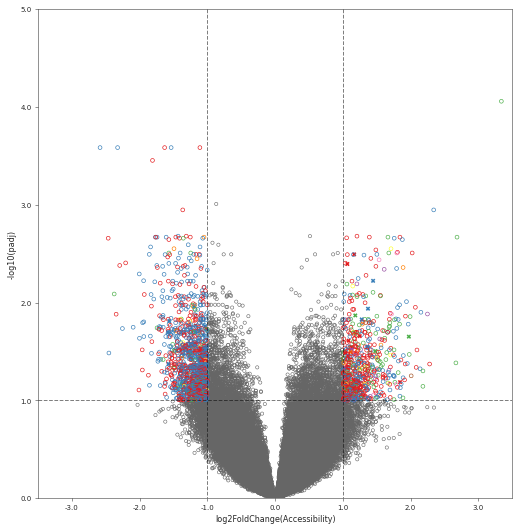

In [10]:
### Figure1 Volcano plot of Differentially Acc result###
sns.set(font="Arial")
sns.set(style="ticks", rc={"axes.linewidth": 0.5})
fig, ax = plt.subplots(figsize=(8.5, 9))
grid=sns.scatterplot(x="log2FoldChange", y="-log10(padj)", hue='Annotation',data=plot_data[plot_data['Annotation']=='None'], palette=ant_p,style="Type-gene" ,markers=[open_circle],alpha=1,linewidth=0,ax=ax,s=15,hue_order = ['promoter-TSS',"5' UTR",'exon','intron','TTS',"3' UTR",'Intergenic','non-coding']).set_title("",size=8,)
grid=sns.scatterplot(x="log2FoldChange", y="-log10(padj)", hue='Annotation',data=plot_data[plot_data['Annotation']!='None'], palette=ant_p,style="Type-gene" ,markers=[open_circle,"X"],alpha=1,linewidth=0,ax=ax,s=20,hue_order = ['promoter-TSS',"5' UTR",'exon','intron','TTS',"3' UTR",'Intergenic','non-coding']).set_title("",size=8,)
plt.plot([-1, -1], [5, 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([1, 1], [5, 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([-3.5, 3.5], [1, 1], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.)
ax.get_legend().remove()
ax.set(xlim=(-3.5, 3.5))
ax.set(ylim=(0, 5))
ax.set_ylabel("-log10(padj)",size = 8)
ax.set_xlabel("log2FoldChange(Accessibility)",size = 8)
ax.set_yticklabels(ax.get_yticks(), size = 7)
ax.set_xticklabels(ax.get_xticks(), size = 7)
ax.xaxis.set_tick_params(width=0.5,size=3)
ax.yaxis.set_tick_params(width=0.5,size=3)
plt.savefig("plots/Figure1B.png",bbox_inches='tight',format="png",dpi=500.0)

Gained peaks distribution


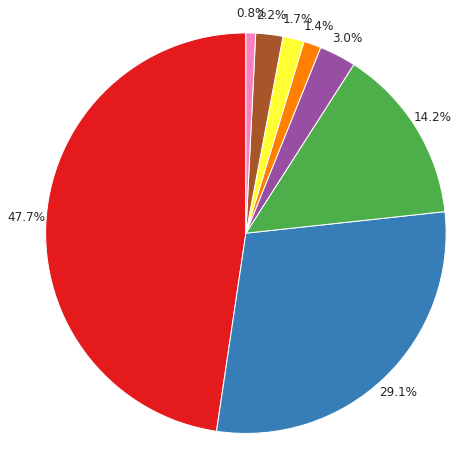

Lost peaks distribution


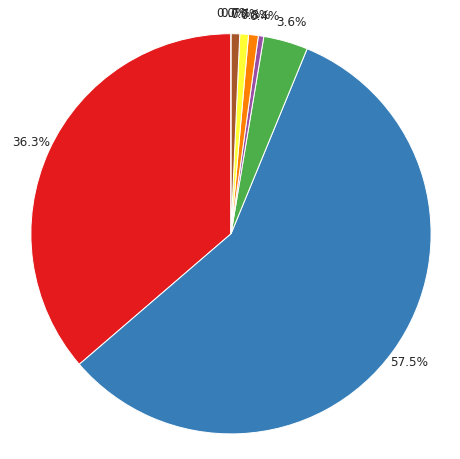

In [11]:
### Distribution of Genomic regions in the significant peaks ###

v= [305,186, 91, 19, 9,11,14,5]
l=['intron','Intergenic', 'promoter-TSS', 'exon', "3' UTR",'non-coding', 'TTS', "5' UTR"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(v, labels=l,startangle=90,colors=ant_col,autopct='%1.1f%%',labeldistance=None,pctdistance=1.1)
ax1.axis('equal')
plt.savefig("plots/Figure1A_pie_gain.png",bbox_inches='tight',format="png")
print("Gained peaks distribution")
plt.show()
v= [415,657, 41,5, 9, 8,8,0]
l=['intron','Intergenic', 'promoter-TSS', 'exon', "3' UTR",'non-coding', 'TTS', "5' UTR"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(v, labels=l,startangle=90,colors=ant_col,autopct='%1.1f%%',labeldistance=None,pctdistance=1.1)
ax1.axis('equal')
plt.savefig("plots/Figure1A_pie_loss.svg",bbox_inches='tight',format="svg")
print("Lost peaks distribution")
plt.show()

###  Distance to nearest peak 

In [274]:
### Find the next closest peak to the significant peaks ###

# COAD GAIN ----> 

bed=pd.DataFrame()
bed['Regions']=coad_limma_gain
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['start']=temp['start'].astype(int)
temp['id']=coad_limma_gain
temp=temp.sort_values(['chr','start'],ascending=True)
bed=pd.DataFrame()
bed['Regions']=coad_limma[~coad_limma.index.isin(coad_limma_gain)].index
temp2=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp2.columns=['chr','start','stop']
temp2['start']=temp2['start'].astype(int)
temp2['id']=coad_limma[~coad_limma.index.isin(coad_limma_gain)].index
temp2=temp2.sort_values(['chr','start'],ascending=True)
a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(temp2)
c_gain = a.closest(b,d=True,io=True)
c_gain=pybedtools.BedTool.to_dataframe(c_gain)
c_gain.sort_values('itemRgb',ascending=True,inplace=True)
bins=[0,  1000, 2000,  5000,  10000,  15000,  30000,950000]
c_gain['bin']=pd.cut(c_gain['itemRgb'], bins=bins)
c_gain=c_gain.merge(coad_de_homer[['name','Annotation']],on='name',how='left')
c_gain['bin']=c_gain['bin'].astype(str)

# COAD LOSS ----> 
bed=pd.DataFrame()
bed['Regions']=coad_limma_loss
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['start']=temp['start'].astype(int)
temp['id']=coad_limma_loss
temp=temp.sort_values(['chr','start'],ascending=True)
bed=pd.DataFrame()
bed['Regions']=coad_limma[~coad_limma.index.isin(coad_limma_loss)].index
temp2=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp2.columns=['chr','start','stop']
temp2['start']=temp2['start'].astype(int)
temp2['id']=coad_limma[~coad_limma.index.isin(coad_limma_loss)].index
temp2=temp2.sort_values(['chr','start'],ascending=True)
a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(temp2)
c_loss = a.closest(b,d=True,io=True)
c_loss=pybedtools.BedTool.to_dataframe(c_loss)
c_loss.sort_values('itemRgb',ascending=True,inplace=True)
bins=[0,  1000, 2000,  5000,  10000,  15000,  30000,950000]
c_loss['bin']=pd.cut(c_loss['itemRgb'], bins=bins)
c_loss=c_loss.merge(coad_de_homer[['name','Annotation']],on='name',how='left')
c_loss['bin']=c_loss['bin'].astype(str)



cd_dis=pd.concat([c_gain,c_loss])


cd_dis['Cancer']='COAD'
dis=cd_dis
dis.columns=['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart','thickEnd', 'Distance', 'Distance_range', 'Annotation', 'Cancer']


In [13]:
coad_limma['Cancer']='COAD'
sig_limma=coad_limma[((coad_limma['log2FoldChange']>1)|(coad_limma['log2FoldChange']< -1)) &(coad_limma['padj']<0.1)]
sig_limma['name']=sig_limma.index



In [275]:
### Prepare data for Figure2: Closest peaks plot ###

gain_st_coad=pd.DataFrame(index=c_gain['bin'].unique(),columns=c_gain['Annotation'].unique())
for i in gain_st_coad.index:
    for c in gain_st_coad.columns:
        l=len(c_gain[(c_gain['bin']==i)&(c_gain['Annotation']==c)])
        gain_st_coad.loc[i,c]=l
gain_st_coad.index=['1kb','2kb',"5kb","10kb",'15kb',"30kb",">30kb"]
gain_st_coad=gain_st_coad[['intron ', 'Intergenic', 'promoter-TSS ', 'exon ', "3' UTR ",
       'non-coding ', 'TTS ', "5' UTR "]]    

loss_st_coad=pd.DataFrame(index=c_loss['bin'].unique(),columns=c_loss['Annotation'].unique())
for i in loss_st_coad.index:
    for c in loss_st_coad.columns:
        l=len(c_loss[(c_loss['bin']==i)&(c_loss['Annotation']==c)])
        loss_st_coad.loc[i,c]=l
loss_st_coad.index=['1kb','2kb',"5kb","10kb",'15kb',"30kb","90kb"]
loss_st_coad=loss_st_coad[['intron ', 'Intergenic', 'promoter-TSS ', 'exon ', "3' UTR ",
       'non-coding ', 'TTS ']]    

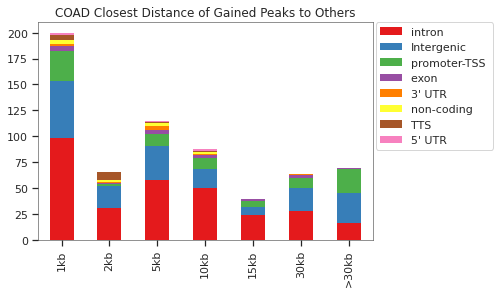

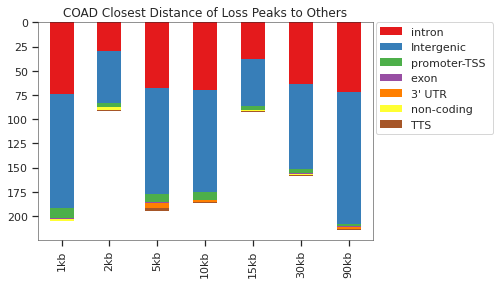

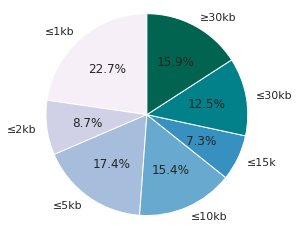

In [276]:
###  Figure2: Closest peaks plot ###

sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots()
gain_st_coad.set_index(gain_st_coad.index).plot(kind='bar',linewidth=0, stacked=True, color=ant_col,ax=ax).set_title('COAD Closest Distance of Gained Peaks to Others')
plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.,fancybox=True, ncol=1)
plt.savefig("plots/Figure1D_gain.png",bbox_inches='tight',format="png")



sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots()
loss_st_coad.set_index(loss_st_coad.index).plot(kind='bar',linewidth=0, stacked=True, color=ant_col,ax=ax).set_title('COAD Closest Distance of Loss Peaks to Others')
plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.,fancybox=True, ncol=1)
ax.invert_yaxis()
plt.savefig("plots/Figure1D_loss.png",bbox_inches='tight',format="png")

l=['≤1kb', '≤2kb', '≤5kb', "≤10kb", '≤15k', '≤30kb', "≥30kb"]
l1=list(gain_st_coad.sum(axis=1))
l2=list(loss_st_coad.sum(axis=1))
v=[sum(x) for x in zip(l1, l2)]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("plots/Figure1D_pie.svg",bbox_inches='tight',format="svg")
plt.show()

### P53 Response Element and Mutant ChiP-Seq

IARC p53 retiver package on the Significant genomic co-ordinates, to get the following file 

In [14]:
# P53 RE from the 5_p53RE.ipynb ---->
li=glob.glob("Results/p53retriever/*.tsv")
re=[]
for i in li:
    re.append(pd.read_csv(i,sep='\t'))
re=pd.concat(re)

sig_limma['P53']='No'
sig_limma['P53'][sig_limma['name'].isin(re['ID'])]='yes'

### Mutant p53 Chip-Seq 
chip_mut=pd.read_csv("data/Oth.ALL.05.TP53.AllCell_38.bed",sep='\t',header=None)
chip=chip_mut[chip_mut[3].str.contains('|'.join(['SW480','MDA-MB-468','HCC70']))]
bed=pd.DataFrame()
bed['Regions']=sig_limma['name']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name']
b=pybedtools.BedTool.from_dataframe(chip)
a = pybedtools.BedTool.from_dataframe(temp)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)

sig_limma['Chip']='No'
sig_limma['Chip'][sig_limma['name'].isin(found[3])]='yes'

### Segemnt Copy Number

In [15]:
### Segment copy number in the significant peaks, from 4_Segment_copy_number.ipynb ###

cn=pd.read_csv("Results/COAD_grch38.seg.v2_allsamples.csv")
cn['Status']="None"
cn['Status'][cn['Segment_Mean']>0.3]="Amplification"
cn['Status'][cn['Segment_Mean']< -0.3]="Deletion"
cn=cn[['Chromosome', 'Start', 'End', 'Num_Probes', 'Segment_Mean', 'Sample', 'Status','GDC_Aliquot']]
cn['Chromosome']='chr'+cn['Chromosome']

bed=pd.DataFrame()
bed['Regions']=sig_limma['name'][sig_limma['Cancer']=='COAD']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name'][sig_limma['Cancer']=='COAD']
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(cn)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)
found[9]=found[9].str.slice(0,12)

coad_m=['TCGA-AA-A010', 'TCGA-QL-A97D', 'TCGA-QG-A5YV', 'TCGA-NH-A50V','TCGA-NH-A8F8',"TCGA-AA-A02F", 'TCGA-4N-A93T', 'TCGA-NH-A6GA', 'TCGA-A6-A567']
coad_w=['TCGA-AD-6889', 'TCGA-AA-A022', 'TCGA-AA-A01P', 'TCGA-DM-A28G','TCGA-AY-A71X', 'TCGA-AA-A01X']

coad_cn=pd.DataFrame(index=found.groupby([3])[8].median().index)
coad_cn['Wild']=found[found[9].isin(coad_w)].groupby([3])[8].median()
coad_cn['Hotspot']=found[found[9].isin(coad_m)].groupby([3])[8].median()

coad_cn_n=coad_cn[(coad_cn['Wild']> -0.3)&(coad_cn['Wild']< 0.3)&(coad_cn['Hotspot']> -0.3)&(coad_cn['Hotspot']< 0.3)].index

sig_limma['Copy_number']='yes'
sig_limma['Copy_number'][(sig_limma['name'].isin(coad_cn_n))&(sig_limma['Cancer']=='COAD')]='no'

In [16]:
sig_limma['Region']='Gain'
sig_limma['Region'][sig_limma['log2FoldChange']<= -1]='Loss'

In [17]:
### File for Upset plot, view using 8_UpSet_plot.ipynb ###
sel=sig_limma[['name','Region','P53','Chip','Copy_number']][sig_limma['Cancer']=='COAD']
sel=sel.replace('No',0)
sel=sel.replace('no',0)
sel=sel.replace('yes',1)
sel=sel.replace('Yes',1)
sel['None']=0
sel['None'][(sel['P53']==0)&(sel['Chip']==0)&(sel['Copy_number']==0)]=1
sel['Copy Number Gain']=0
sel['Copy Number Loss']=0
sel['Copy Number Gain'][(sel['Region']=='Gain') &(sel['Copy_number']==1)]=1
sel['Copy Number Loss'][(sel['Region']=='Loss') &(sel['Copy_number']==1)]=1
sel.drop('Copy_number',inplace=True,axis=1)
sel.colnames=['name','region','P53 RE','Mutant Chip Sites','None',"Copy Number Gain" ,"Copy Number Loss"]
sel.to_csv('Results/coad_upset.tsv',sep='\t',index=None)

## Enrichment of transcription factors binding motifs in the differentially accessible regions 

### HOMER 

In [18]:
### Input bed files for HOMER de novo motif using FindMotifsGenome.pl ###
c='COAD'
bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_b_gain.bed",sep='\t',header=None,index=None)
print(c+"_Group_b_gain.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_b_loss.bed",sep='\t',header=None,index=None)
print(c+"_Group_b_loss.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_a_gain.bed",sep='\t',header=None,index=None)
print(c+"_Group_a_gain.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_a_loss.bed",sep='\t',header=None,index=None)
print(c+"_Group_a_loss.bed",len(temp))


COAD_Group_b_gain.bed 326
COAD_Group_b_loss.bed 484
COAD_Group_a_gain.bed 222
COAD_Group_a_loss.bed 392


In [19]:
### Denovo motif results currated from HOMER ###
denovo=pd.read_csv("data/Denovo.tsv",sep='\t')
temp=pd.DataFrame(denovo.groupby('name')['Motif'].apply(list))
temp['Motif']=temp['Motif'].astype('str')
temp['name']=temp.index
temp.index.name=None
sig_limma=pd.merge(sig_limma, temp[['Motif','name']],on=['name'],how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None

In [20]:
sig_limma['Denovo']='no'
sig_limma['Denovo'][sig_limma.index.isin(denovo['name'])]='yes'

### JASPAR 

Motif Enrichment using JASPAR predicted motifs present in significant and non-significant regions. Motif cut-off score of >=400

In [21]:
import random

In [22]:
def get_random(dic1,df):
    random.seed(4)
    out=[]
    for i,n in dic1.items():
        unsig=df[df['Annotation']==i]
        out.extend(random.sample(list(unsig.index),n))
    return out
        

In [23]:
coad_un=list(pd.read_csv("data/COAD_Jaspar_Background",sep='\t',header=None)[0])
coad_un=coad_limma[coad_limma.index.isin(coad_un)]
coad_un['Annotation']=coad_un['Annotation'].str.strip()
sig_tf=pd.read_csv("data/jasper_tf.bed",sep='\t',header=None)
un_tf=pd.read_csv("data/Jasper_unsig_tf.bed",sep='\t',header=None)
un_tf=un_tf[un_tf[4]>=400]
sig_tf=sig_tf[sig_tf[4]>=400]

In [24]:
sig_limma['Annotation']=sig_limma['Annotation'].str.strip()

In [25]:
bed=pd.DataFrame()
bed['Regions']=sig_limma[sig_limma['Cancer']=='COAD'].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma[sig_limma['Cancer']=='COAD'].index
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(sig_tf)
found1 = a.intersect(b, wo=True)
found1=pybedtools.BedTool.to_dataframe(found1, header=None)

bed=pd.DataFrame()
bed['Regions']=coad_un.index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=coad_un.index
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(un_tf)
found2 = a.intersect(b, wo=True)
found2=pybedtools.BedTool.to_dataframe(found2, header=None)

In [26]:
coad_gain_tf=pd.DataFrame(index=set(list(found1['thickEnd'])+list(found1['thickEnd'])),columns=['target_per','background_per','p-value'])
gain_sig=sig_limma[(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']=='COAD')].index
gain_un=get_random(dict(sig_limma['Annotation'][(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']=='COAD')].value_counts()),coad_un)

for t in set(list(found1['thickEnd'])+list(found1['thickEnd'])):
    sig_yes=found1['name'][found1['name'].isin(gain_sig)&(found1['thickEnd']==t)].nunique()
    sig_no=len(gain_sig)-sig_yes
    un_yes=found2['name'][found2['name'].isin(gain_un)&(found2['thickEnd']==t)].nunique()
    un_no=len(gain_un)-un_yes
    oddsratio, pvalue = scipy.stats.fisher_exact(np.array([[sig_yes,sig_no],[un_yes,un_no]]), alternative="greater")
    coad_gain_tf.loc[t,'target_per']=(sig_yes/len(gain_sig)*100)
    coad_gain_tf.loc[t,'background_per']=(un_yes/len(gain_un)*100)
    coad_gain_tf.loc[t,'p-value']=pvalue
coad_gain_tf.to_csv("Results/COAD_JASPAR_TF_Gain.tsv",sep='\t')

In [27]:
coad_loss_tf=pd.DataFrame(index=set(list(found1['thickEnd'])+list(found1['thickEnd'])),columns=['target_per','background_per','p-value'])
loss_sig=sig_limma[(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']=='COAD')].index
loss_un=get_random(dict(sig_limma['Annotation'][(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']=='COAD')].value_counts()),coad_un)

for t in set(list(found1['thickEnd'])+list(found1['thickEnd'])):
    sig_yes=found1['name'][found1['name'].isin(loss_sig)&(found1['thickEnd']==t)].nunique()
    sig_no=len(loss_sig)-sig_yes
    un_yes=found2['name'][found2['name'].isin(loss_un)&(found2['thickEnd']==t)].nunique()
    un_no=len(loss_un)-un_yes
    oddsratio, pvalue = scipy.stats.fisher_exact(np.array([[sig_yes,sig_no],[un_yes,un_no]]), alternative="greater")
    coad_loss_tf.loc[t,'target_per']=(sig_yes/len(loss_sig)*100)
    coad_loss_tf.loc[t,'background_per']=(un_yes/len(loss_un)*100)
    coad_loss_tf.loc[t,'p-value']=pvalue
coad_loss_tf.to_csv("Results/COAD_JASPAR_TF_Loss.tsv",sep='\t')

In [28]:
x=statsmodels.stats.multitest.multipletests(np.array(coad_gain_tf['p-value']), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
coad_gain_tf['fdr']=x[1]
coad_gain_tf['-log10(p-value)']=-np.log10(list(coad_gain_tf['p-value']))

x=statsmodels.stats.multitest.multipletests(np.array(coad_loss_tf['p-value']), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
coad_loss_tf['fdr']=x[1]
coad_loss_tf['-log10(p-value)']=-np.log10(list(coad_loss_tf['p-value']))

coad_gain_tf['color']='Other'
coad_gain_tf['color'][(coad_gain_tf['fdr']<=0.1)]='q-value ≤ 0.1'

coad_loss_tf['color']='Other'
coad_loss_tf['color'][(coad_loss_tf['fdr']<=0.1)]='q-value ≤ 0.1'
                      


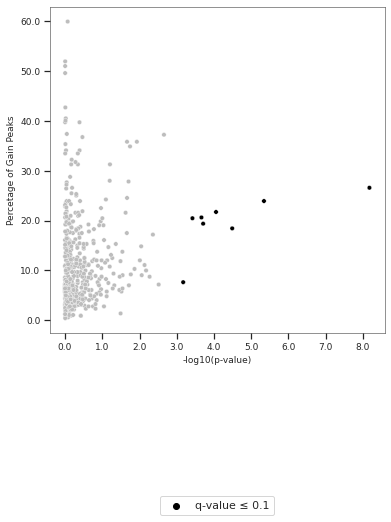

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
cols={'q-value ≤ 0.1': '#000000','Other': '#bdbdbd'}
sns.scatterplot(coad_gain_tf['-log10(p-value)'],coad_gain_tf['target_per'], hue=coad_gain_tf['color'],palette=cols,ax=ax,s=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, ncol=2,borderaxespad=0.)
ax.set_ylabel("Percetage of Gain Peaks",size=9)
ax.set_xlabel("-log10(p-value)",size=9)
ax.set_yticklabels(ax.get_yticks(), size = 9)
ax.set_xticklabels(ax.get_xticks(), size = 9)
plt.savefig("plots/Figure2C.png",bbox_inches='tight',format="png")
plt.show()

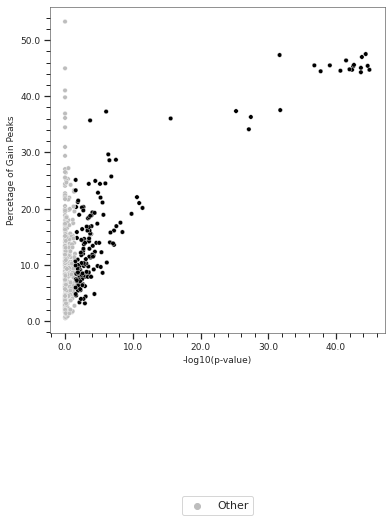

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
cols={'q-value ≤ 0.1': '#000000','Other': '#bdbdbd'}
sns.scatterplot(coad_loss_tf['-log10(p-value)'],coad_loss_tf['target_per'], hue=coad_loss_tf['color'],palette=cols,ax=ax,s=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, ncol=2,borderaxespad=0.)
ax.set_ylabel("Percetage of Gain Peaks",size=9)
ax.set_xlabel("-log10(p-value)",size=9)
ax.set_yticklabels(ax.get_yticks(), size = 9)
ax.set_xticklabels(ax.get_xticks(), size = 9)
ax.minorticks_on()
plt.savefig("plots/Figure2D.png",bbox_inches='tight',format="png")
plt.show()

## Enrichment of enhancer marks and G-quadruplex structure in the differentially accessible regions 

### G-quadruplex

In [31]:
### Non-B form structure ditribution, Downloaded from https://nonb-abcc.ncifcrf.gov/apps/site/default ###
st=pd.read_csv("data/Gquad_nonB_forms_hg38.bed",sep='\t',header=None,index_col=0)
bed=pd.DataFrame()
bed['Regions']=sig_limma['name']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name']


a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(st)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)

sig_limma['G-Quadruplex']='No'
sig_limma['G-Quadruplex'][sig_limma['name'].isin(found['name'])]='yes'

### Enhancer

In [32]:
### Enhancer intraction (Double elite status) from Genehancer, downloaded from UCSC Table browser for significant regions ###
### Download and name the file as mentioned ###

en=pd.read_csv("data/gene_enhancer_2017.bed_hg38.bed",sep='\t')
en=en[['#chrom', 'chromStart', 'chromEnd','geneName']]
bed=pd.DataFrame()
bed['Regions']=sig_limma.index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma.index
temp.head()

a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(en)
found = a.intersect(b,wo=True)
found=pybedtools.BedTool.to_dataframe(found)
found=pd.DataFrame(found.groupby('name')['thickEnd'].apply(list))
found['Ehancer']='yes'
found['name']=found.index
found.index.name=None
found.columns=['Enhancer-Gene','Enhancer','name']
sig_limma=pd.merge(sig_limma,found,on='name',how='left')

In [33]:
sig_limma.index=sig_limma['name']
sig_limma.index.name=None

## Impact of chromatin accessibility changes on gene expression

### Gene level copy number 

In [34]:
## Gene level relative copy number obtained from https://gdc.cancer.gov/about-data/publications/panimmune ###
coad_w=['TCGA-AD-6889','TCGA-AA-A01P','TCGA-DM-A28G', 'TCGA-AY-A71X', 'TCGA-AA-A01X']
coad_m=['TCGA-QL-A97D','TCGA-QG-A5YV','TCGA-NH-A50V','TCGA-NH-A8F8','TCGA-4N-A93T','TCGA-NH-A6GA','TCGA-A6-A567']

sel_cna=pd.read_csv('data/Gene_Copy_number.tsv',sep='\t',index_col=0)
temp1=pd.DataFrame(index=sel_cna.index)
temp1['Hotspot_cna']=sel_cna[coad_m].median(axis=1)
temp1['Wild_cna']=sel_cna[coad_w].median(axis=1)
temp1['Cancer']='COAD'
t=temp1
t['Gene Name']=t.index
sig_limma=pd.merge(sig_limma,t,on=['Gene Name','Cancer'], how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None



#### Log2FC(RSEM+0.001) of linked genes; Mutant vs Wild

In [35]:
### TCGA Gene level Log2FC(RSEM+0.001) values ###
final_exp=pd.read_csv("data/Atac_seq_exp_W&H.tsv",sep="\t",index_col=0)

temp1=pd.DataFrame(index=final_exp.index)
temp1['Hot_median_atac']=final_exp[coad_m].median(axis=1)
temp1['Wild_median_atac']=final_exp[coad_w].median(axis=1)

temp1['L2FC_median_atac_2']=(np.log2(final_exp[coad_m].median(axis=1)/final_exp[coad_w].median(axis=1)))
temp1['Cancer']='COAD'

t=temp1
t['Gene Name']=t.index
sig_limma=pd.merge(sig_limma,t[['Gene Name','Cancer','Hot_median_atac','Wild_median_atac','L2FC_median_atac_2']],on=['Gene Name','Cancer'], how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None


#### TCGABiolinks expression 

In [36]:
cl={'None':'#bdbdbd','Other':'#31a354','Known Up':'#f03b20','Known Down':'#756bb1', 'Cancer':'#c51b8a'}


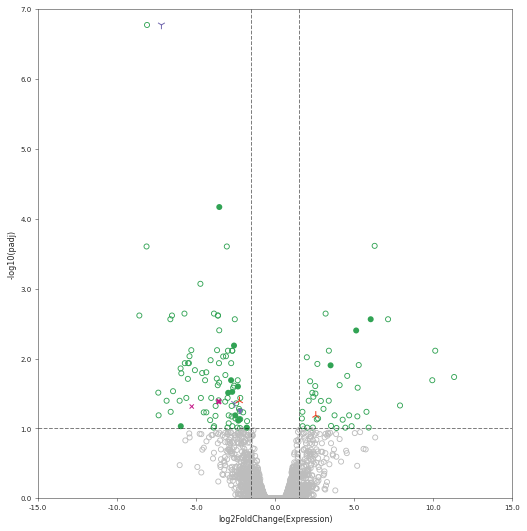

In [37]:
### Differential Expression Plot from 3_Differential_exp.ipynb ###
sns.set(font="Arial")
plt.rcParams["lines.markeredgewidth"] = 1
sns.set(style="ticks", rc={"axes.linewidth": 0.5})
fig, ax = plt.subplots(figsize=(8.5, 9))
br=pd.read_csv("Results/COAD_DEG_HW_raw.tsv",sep='\t',index_col=0)
br['-log10(padj)']=-np.log10(br['FDR'])
br['Type']="Other"
br['Type'][br['mRNA'].isin(cancer)]='Cancer'
br['Type'][br['mRNA'].isin(mut_down)]='Known Down'
br['Type'][br['mRNA'].isin(mut_up)]='Known Up'
br['Type'][((br['logFC']<=1)|(br['logFC']>= -1))&(br['FDR']>0.1)]="None"
br['Atac']='No'
br['Atac'][(br['FDR']<0.1)&(br['logFC']>1)&(br['mRNA'].isin(sig_limma['Gene Name'][sig_limma['log2FoldChange']>1]))]='yes'
br['Atac'][(br['FDR']<0.1)&(br['logFC']< -1)&(br['mRNA'].isin(sig_limma['Gene Name'][sig_limma['log2FoldChange']< -1]))]='yes'
br['size']=30
br['size'][br['Type']=='Known Down']=40
br['size'][br['Type']=='Known Up']=40
br['size'][br['Type']=='Cancer']=20
sns.set_style("white")
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Up','Known Down','Cancer','Other',"None"],markers={'None':open_circle,'Other': open_circle} ,data=br[(br['Atac']=='No')&(br['Type'].isin(['None','Other']))], alpha=1,linewidth=0,ax=ax)
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Up','Known Down','Cancer','Other',"None"],markers={'None':"None",'Other': "None",'Known Down':'1','Known Up':'2','Cancer':'x'} ,data=br[br['Atac']=='No'], alpha=1,linewidth=1,ax=ax,size="size")
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Down','Cancer','Other',"None"],markers={'None':"o",'Other': "o",'Known Down':'v','Known Up':'^','Cancer':'X'},data=br[br['Atac']=='yes'], alpha=1,linewidth=0,ax=ax)
plt.plot([-1.5, -1.5], [7., 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([1.5, 1.5], [7., 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([-15, 15], [1, 1], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.,prop={'size': 8})
ax.get_legend().remove()
ax.set(xlim=(-15, 15))
ax.set(ylim=(0, 7))
ax.set_ylabel("-log10(padj)",size = 8)
ax.set_xlabel("log2FoldChange(Expression)",size = 8)
ax.set_yticklabels(ax.get_yticks(), size = 7)
ax.set_xticklabels(ax.get_xticks(), size = 7)
ax.xaxis.set_tick_params(width=0.5,size=3)
ax.yaxis.set_tick_params(width=0.5,size=3)
plt.savefig("plots/Figure4B.png",bbox_inches='tight',format="png",dpi=500.0,transparent=True)

### Histone and Enhancer overlap in mutant cell lines

In [38]:
### Histone data for mutant cell lines currated from ChipAtlas ###
coad_his=pd.read_csv("data/COAD_histone.tsv",sep='\t')

In [39]:
cols=['#addd8e','#41b6c4','#f768a1','#fed976','#d95f0e','#8c96c6','#d4b9da']

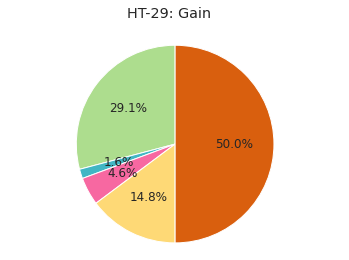

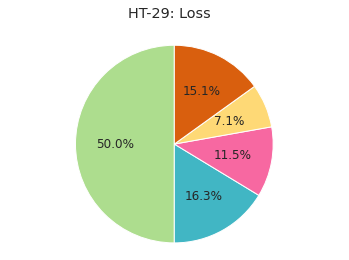

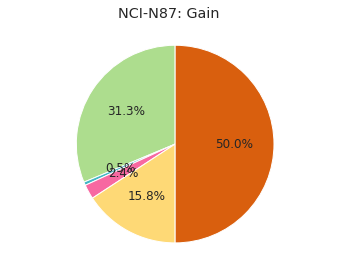

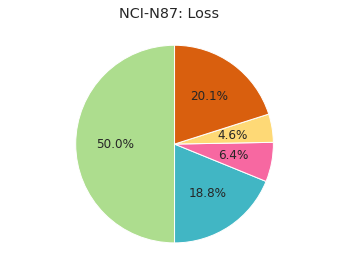

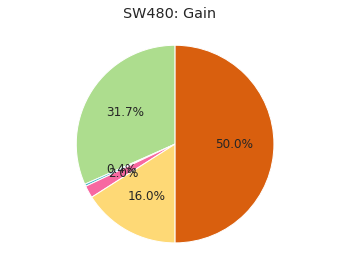

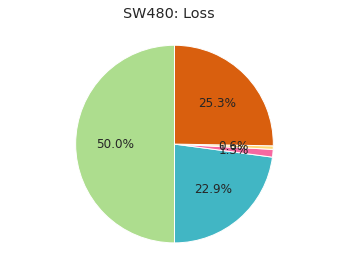

In [40]:
his=['H3K27ac']
dt=pd.DataFrame(index=['With_Gain','Without_Gain','With_Loss','Without_Loss'],columns=['Enhancer','Histone Mark','Dnase','E&H','E&H&D','E&D','None'])
celline=['HT-29', 'NCI-N87', 'SW480']
for h in his:
    for c in celline:
        temp=sig_limma[(sig_limma['Cancer']=='COAD')&(sig_limma['Copy_number']=='no')]
        temp=temp.fillna(0)
        dt1=pd.DataFrame(index=temp.index)
        dt1['Enhancer']=temp['Enhancer']
        dt1['Enhancer']=dt1['Enhancer'].replace(0,'no')
        dt1['Region']=temp['Region']
        dt1['Histone Mark']='no'
        dt1['Histone Mark'][dt1.index.isin(coad_his['ID'][(coad_his['blockSizes']==h)&(coad_his['itemRgb']==c)])]='yes'
        dt1[c]='no'
        #dt1['SW480'][dt1.index.isin(found2[3])]='yes'
        #dt1['HT-29']='no'
        #dt1['HT-29'][dt1.index.isin(found[3])]='yes'
        #dt1['NCI-N87']='no'
        dt1['Denovo']=temp['Denovo']
        dt1['Cancer']=temp['Cancer']

        dt.loc['With_Gain','Enhancer']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['With_Loss','Enhancer']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Gain_enhancer.bed',header=None,index=False,sep='\t')
        
        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Loss_enhancer.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='yes')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Loss_histone.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='yes')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Gain_histone.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Gain_None.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_COAD_Loss_None.bed',header=None,index=False,sep='\t')

        
        dt.loc['With_Gain','Histone Mark']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['With_Loss','Histone Mark']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
        dt.loc['With_Gain','E&H']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['With_Loss','E&H']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
    
        dt.loc['Without_Gain','Enhancer']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['Without_Loss','Enhancer']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
        dt.loc['Without_Gain','Histone Mark']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['Without_Loss','Histone Mark']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
        dt.loc['Without_Gain','E&H']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['Without_Loss','E&H']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
        
        dt.loc['Without_Gain','None']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['Without_Loss','None']=len(dt1[(dt1['Denovo']=='no')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)

        dt.loc['With_Gain','None']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='COAD')].index)
        dt.loc['With_Loss','None']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Histone Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='COAD')].index)
  
        

        l=['Enhancer','Histone Mark','E&H','None','Rest']
        v=list(dt[:2][['Enhancer','Histone Mark','E&H','None']].sum())
        v.append(548)
        fig1, ax1 = plt.subplots()
        ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%',labeldistance=None)
        ax1.axis('equal')
        fig1.suptitle(c+': Gain')
        plt.savefig("plots/Figure3B_Gain"+c+"_"+h+".svg",bbox_inches='tight',format="svg")
        plt.show()
        
        l=['Rest','None','E&H','Histone Mark','Enhancer']
        v=[876]
        v.extend(list(dt[2:][['None','E&H','Histone Mark','Enhancer']].sum()))
        
        fig1, ax1 = plt.subplots()
        ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%',labeldistance=None)
        ax1.axis('equal')
        fig1.suptitle(c+': Loss')
        plt.savefig("plots/Figure3B_Loss"+c+"_"+h+".svg",bbox_inches='tight',format="svg")
        
        plt.show()

In [41]:
### Final result file
sig_limma.to_csv("Results/COAD_Result.tsv",sep='\t')

In [42]:
### Percentage of columns in gain and loss
for cl in ['Annotation', 'Type-gene', 'Enhancer', 'P53', 'Chip', 'Copy_number', 'G-Quadruplex']:
    for c in ['COAD']:
        print ("--------------------------------------------------------------------------")
        print(c+" Gain "+ cl) 
        print(sig_limma[cl][(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)].value_counts(normalize=True))
        print("\n"+c+" Loss "+ cl)
        print(sig_limma[cl][(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)].value_counts(normalize=True))
        print ("-------------------------------------------------------------------------- \n")

--------------------------------------------------------------------------
COAD Gain Annotation
intron          0.476562
Intergenic      0.290625
promoter-TSS    0.142187
exon            0.029687
TTS             0.021875
non-coding      0.017188
3' UTR          0.014063
5' UTR          0.007812
Name: Annotation, dtype: float64

COAD Loss Annotation
Intergenic      0.574803
intron          0.363080
promoter-TSS    0.035871
3' UTR          0.007874
non-coding      0.006999
TTS             0.006999
exon            0.004374
Name: Annotation, dtype: float64
-------------------------------------------------------------------------- 

--------------------------------------------------------------------------
COAD Gain Type-gene
Other         0.932813
Cancer        0.045312
Known Down    0.012500
Known Up      0.009375
Name: Type-gene, dtype: float64

COAD Loss Type-gene
Other         0.951881
Cancer        0.024497
Known Down    0.013123
Known Up      0.010499
Name: Type-gene, dtype: float64
